# Importer les librairies

In [ ]:
# python -m venv venv
# source venv/bin/activate
# pip install -r requirements.txt

#  pip freeze > requirements.txt

In [1]:
import pandas as pd

# Importer les données

In [2]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [3]:
import pandas as pd

def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    """La fonction prépare les données à l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocessée et prête à être analysée.
    """

    # Faire une copie de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

    # Supprimez les lignes contenant au moins une valeur manquante
    data_preprocessed.dropna(inplace=True)

    # Créer une variable `FamilySize` et supprimer les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)

    # Recalculer le prix du billet en divisant par `FamilySize`
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)

    # Réinitialiser l'index après suppression de valeurs manquantes
    data_preprocessed.reset_index(drop=True, inplace=True)

    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [4]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,True,False,True
1,1,1,38.0,35.641650,2,False,False,False
2,1,3,26.0,7.925000,1,False,False,True
3,1,1,35.0,26.550000,2,False,False,True
4,0,3,35.0,8.050000,1,True,False,True
...,...,...,...,...,...,...,...,...
707,0,3,39.0,4.854167,6,False,True,False
708,0,2,27.0,13.000000,1,True,False,True
709,1,1,19.0,30.000000,1,False,False,True
710,1,1,26.0,30.000000,1,True,False,False


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

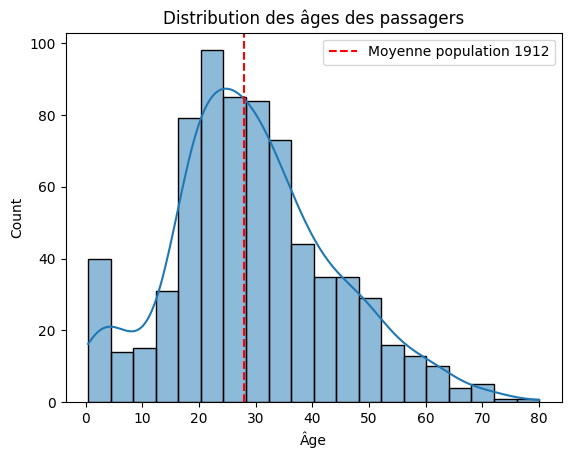

Shapiro-Wilk p-value : 0.000
t = 3.023, p = 0.003
Conclusion : On rejette H0 → l'âge moyen est différent de 28 ans.
Cohen's d = 0.113


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_1samp

# 1. Visualisation
sns.histplot(data_clean["Age"], kde=True)
plt.axvline(28, color='red', linestyle='--', label='Moyenne population 1912')
plt.legend()
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.show()

# 2. Test de normalité
stat, p_shapiro = shapiro(data_clean["Age"])
print(f"Shapiro-Wilk p-value : {p_shapiro:.3f}")

# 3. Test t pour une moyenne
t_stat, p_value = ttest_1samp(data_clean["Age"], popmean=28)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

# 4. Décision
alpha = 0.05
if p_value < alpha:
    print("Conclusion : On rejette H0 ➡️ l'âge moyen est différent de 28 ans.")
else:
    print("Conclusion : On ne rejette pas H0 ➡️ pas de différence significative.")

# 5. Taille de l'effet : Cohen's d
mean_age = data_clean["Age"].mean()
std_age = data_clean["Age"].std()
cohen_d = (mean_age - 28) / std_age
print(f"Cohen's d = {cohen_d:.3f}")

print("conclusion : L'effet est faible (0.2 < d < 0.5) ➡️ pas de différence significative.")


**Q2: La survie dépend-elle de la classe du passager?**

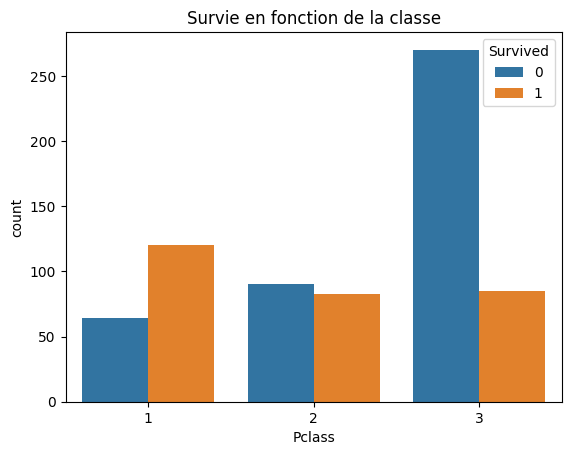

Chi2 = 91.081, p-value = 0.000
Conclusion: On rejette H0 → la survie dépend de la classe.


In [ ]:
from scipy.stats import chi2_contingency

# Visualisation
sns.countplot(x='Pclass', hue='Survived', data=data_clean)
plt.title("Survie en fonction de la classe")
plt.show()

# Tableau de contingence et test du Chi
contingency_table = pd.crosstab(data_clean["Pclass"], data_clean["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")
if p < 0.05:
    print("Conclusion : On rejette H0 ➡️  la survie dépend de la classe.")
else:
    print("Conclusion : on ne rejette pas H0 ➡️ pas de différence significative.")

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

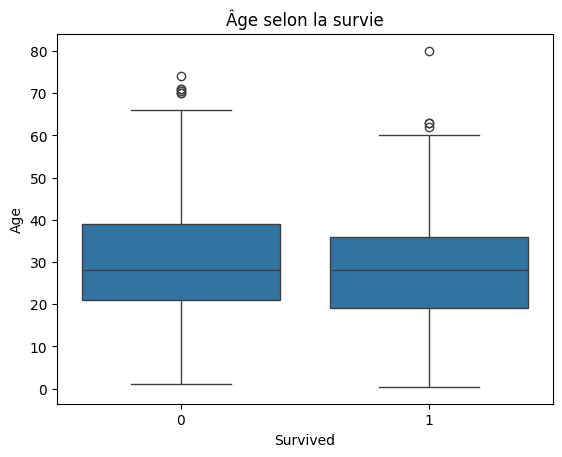

t = 2.184, p-value = 0.029
conclusion : on rejette H0 ➡️ différence significative d'âge.


In [8]:
from scipy.stats import ttest_ind

# Visualisation
sns.boxplot(x="Survived", y="Age", data=data_clean)
plt.title("Âge selon la survie")
plt.show()

# Test t d'indépendance
group_not_survived = data_clean.loc[data_clean["Survived"] == 0, "Age"]
group_survived = data_clean.loc[data_clean["Survived"] == 1, "Age"]
t_statistic, p_value_diff_age = ttest_ind(group_not_survived, group_survived, equal_var=False)
print(f"t = {t_statistic:.3f}, p-value = {p_value_diff_age:.3f}")
if p_value_diff_age < alpha:
    print("conclusion : on rejette H0 ➡️ différence significative d'âge.")
else:
    print("conclusion : on ne rejette pas H0 ➡️ pas de différence significative.")

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**